# Draw Focus for paper


- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS

- creation date : May 12th 2020




In [166]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib as mpl
import pandas as pd
import itertools
import matplotlib.gridspec as gridspec

In [167]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (13, 13),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'font.size': 14}
plt.rcParams.update(params)

## Constants for conversions

In [168]:
m_to_mm=1000.
mm_to_m=1e-3
inch_to_mm=25.4
mm_to_inch=1./inch_to_mm
micr_to_m=1e-6
micr_to_mm=1e-3
m_to_micr=1./micr_to_m
m_to_cm=100.
m_to_nm=1e9
nm_to_m=1./m_to_nm

In [169]:
arcdeg_to_arcmin=60.
arcmin_to_arcdeg=1./arcdeg_to_arcmin
arcmin_to_arcsec=60.
arcdeg_to_arcsec=arcdeg_to_arcmin*arcmin_to_arcsec
arcsec_to_arcdeg=1./arcdeg_to_arcsec

In [170]:
deg_to_rad=np.pi/180.

In [171]:
rad_to_deg=1./deg_to_rad
rad_to_arcsec=rad_to_deg*arcdeg_to_arcsec
rad_to_arcmin=rad_to_deg*arcdeg_to_arcmin
arcmin_ro_rad=1./rad_to_arcmin

## Configuration parameters at the telescope

#### telescope

In [172]:
Tel_Focal_Length=12.6 # m : Focal length of the telescope
Tel_Diameter=0.9 # m : Diameter of the telescope    
Tel_Fnum=Tel_Focal_Length/Tel_Diameter

#### filter

In [173]:
Filt_D=0.05769 # m distance of the filter position wrt CCD plane
Filt_size=3*inch_to_mm

#### CCD detector

In [174]:
Det_xpic=24.0 # microns per pixel
#Det_NbPix=2048 # number of pixels per CCD side
Det_NbPix=2512 # number of pixels per CCD side For 400 only
Det_size=Det_xpic*Det_NbPix*micr_to_mm # CCD size in mm, 5 cm or 2 inch

## Input file

In [175]:
# number of rays
NBEAM_X=11
NBEAM_Y=11
NBEAM=NBEAM_X*NBEAM_Y
NWL=4
NBTOT=NBEAM*NWL

In [176]:
theta_x=0.  # angle in arcmin
theta_y=0.  # angle in arcmin 

In [177]:
theta_x_num=int(theta_x*10)
theta_y_num=int(theta_y*10)

In [178]:
if theta_x_num>0:
    theta_nstr='{:0>2}'.format(theta_x_num)
    theta_x_str="p"+theta_nstr
else:
    theta_nstr='{:0>2}'.format(-theta_x_num)
    theta_x_str="m"+theta_nstr

In [179]:
if theta_y_num>0:
    theta_nstr='{:0>2}'.format(theta_y_num)
    theta_y_str="p"+theta_nstr
else:
    theta_nstr='{:0>2}'.format(-theta_y_num)
    theta_y_str="m"+theta_nstr

In [180]:
Beam4_Rayfile="Beam4_Rayfile_{:d}_allwl_{}_{}".format(NBTOT,theta_x_str,theta_y_str)

In [181]:
Beam4_Rayfile

'Beam4_Rayfile_484_allwl_m00_m00'

## Wavelength

In [182]:
ColorDict = {0.0004:"b",0.0006:"g",0.0008:"r",0.001:"k"}

# Read input files

In [183]:
rayfile_hoe=Beam4_Rayfile+"_RAY_HOE_OUT.xlsx"
rayfile_R400=Beam4_Rayfile+"_RAY_RON400_OUT.xlsx"
rayfile_R200=Beam4_Rayfile+"_RAY_RON200_OUT.xlsx"

In [184]:
input_hoe = pd.ExcelFile(rayfile_hoe)
df_hoe = input_hoe.parse(index_row=0,header=1)
df_hoe=df_hoe.iloc[0:NBTOT]

In [185]:
# rename columns otherwise they are not recognize and swap X,Y
#df_hoe.columns = ["X0","Y0","Z0","U0","V0","W0","wave","X1","Y1","Z1","X2","Y2","Z2","X3","Y3","Z3","Xfinal","Yfinal","Zfinal","Notes"]
df_hoe.columns = ["Y0","X0","Z0","V0","U0","W0","wave","Y1","X1","Z1","Y2","X2","Z2","Y3","X3","Z3","Yfinal","Xfinal","Zfinal","Notes"]

In [186]:
df_hoe

,Y0,X0,Z0,V0,U0,W0,wave,Y1,X1,Z1,Y2,X2,Z2,Y3,X3,Z3,Yfinal,Xfinal,Zfinal,Notes
0,-2.91378,-2.91378,0,0.0252377,0.0252377,0.999363,0.0004,-1.45664,-1.45664,57.7,-1.43476,-1.43476,59,-0.00823,8.12086,115.814,-0.00823,8.12086,115.8135,OK
1,-2.33103,-2.91378,0,0.0201925,0.0252406,0.999478,0.0004,-1.16531,-1.45664,57.7,-1.14781,-1.43476,59,-0.00658,8.12081,115.814,-0.00658,8.12081,115.8135,OK
2,-1.74827,-2.91378,0,0.0151457,0.0252429,0.999567,0.0004,-0.873985,-1.45664,57.7,-0.86086,-1.43476,59,-0.00494,8.12077,115.814,-0.00494,8.12077,115.8135,OK
3,-1.16551,-2.91378,0,0.0100978,0.0252445,0.99963,0.0004,-0.582655,-1.45664,57.7,-0.5739,-1.43476,59,-0.00329,8.12074,115.814,-0.00329,8.12074,115.8135,OK
4,-0.582757,-2.91378,0,0.0050491,0.0252454,0.999668,0.0004,-0.291327,-1.45664,57.7,-0.28695,-1.43476,59,-0.00164,8.12071,115.814,-0.00164,8.12071,115.8135,OK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,0.582757,2.91378,0,-0.0050491,-0.0252454,0.999668,0.001,0.291327,1.45664,57.7,0.28695,1.43476,59,-0.00755,21.4428,115.814,-0.00755,21.4428,115.8135,OK
480,1.16551,2.91378,0,-0.0100978,-0.0252445,0.99963,0.001,0.582655,1.45664,57.7,0.5739,1.43476,59,-0.01509,21.4428,115.814,-0.01509,21.4428,115.8135,OK
481,1.74827,2.91378,0,-0.0151457,-0.0252429,0.999567,0.001,0.873985,1.45664,57.7,0.86086,1.43476,59,-0.02263,21.4429,115.814,-0.02263,21.4429,115.8135,OK
482,2.33103,2.91378,0,-0.0201925,-0.0252406,0.999478,0.001,1.16531,1.45664,57.7,1.14781,1.43476,59,-0.03018,21.4429,115.814,-0.03018,21.4429,115.8135,OK


In [187]:
input_R400 = pd.ExcelFile(rayfile_R400)
df_R400 = input_R400.parse(index_row=0,header=1)
df_R400=df_R400.iloc[0:NBTOT]

In [188]:
# rename columns otherwise they are not recognize
df_R400.columns = ["X0","Y0","Z0","U0","V0","W0","wave","X1","Y1","Z1","X2","Y2","Z2","X3","Y3","Z3","Xfinal","Yfinal","Zfinal","Notes"]

In [189]:
df_R400

,X0,Y0,Z0,U0,V0,W0,wave,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,Xfinal,Yfinal,Zfinal,Notes
0,-2.91378,-2.91378,0,0.0252377,0.0252377,0.999363,0.0004,-1.45664,-1.45664,57.7,-1.43779,-1.45407,57.8,9.44225,0.02828,115.5,9.44225,0.02828,115.5,OK
1,-2.33103,-2.91378,0,0.0201925,0.0252406,0.999478,0.0004,-1.16531,-1.45664,57.7,-1.14699,-1.45407,57.8,9.42662,0.02703,115.5,9.42662,0.02703,115.5,OK
2,-1.74827,-2.91378,0,0.0151457,0.0252429,0.999567,0.0004,-0.873985,-1.45664,57.7,-0.85619,-1.45407,57.8,9.41176,0.0258,115.5,9.41176,0.0258,115.5,OK
3,-1.16551,-2.91378,0,0.0100978,0.0252445,0.99963,0.0004,-0.582655,-1.45664,57.7,-0.56539,-1.45408,57.8,9.39767,0.02456,115.5,9.39767,0.02456,115.5,OK
4,-0.582757,-2.91378,0,0.0050491,0.0252454,0.999668,0.0004,-0.291327,-1.45664,57.7,-0.27459,-1.45408,57.8,9.38434,0.02332,115.5,9.38434,0.02332,115.5,OK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,0.582757,2.91378,0,-0.0050491,-0.0252454,0.999668,0.001,0.291327,1.45664,57.7,0.33433,1.45389,57.8,25.149,-0.13227,115.5,25.149,-0.13227,115.5,OK
480,1.16551,2.91378,0,-0.0100978,-0.0252445,0.99963,0.001,0.582655,1.45664,57.7,0.62501,1.4539,57.8,25.0651,-0.1285,115.5,25.0651,-0.1285,115.5,OK
481,1.74827,2.91378,0,-0.0151457,-0.0252429,0.999567,0.001,0.873985,1.45664,57.7,0.9157,1.4539,57.8,24.9839,-0.12475,115.5,24.9839,-0.12475,115.5,OK
482,2.33103,2.91378,0,-0.0201925,-0.0252406,0.999478,0.001,1.16531,1.45664,57.7,1.20638,1.45391,57.8,24.9053,-0.12103,115.5,24.9053,-0.12103,115.5,OK


In [190]:
input_R200 = pd.ExcelFile(rayfile_R200)
df_R200 = input_R200.parse(index_row=0,header=1)
df_R200=df_R200.iloc[0:NBTOT]

In [191]:
# rename columns otherwise they are not recognize
df_R200.columns = ["X0","Y0","Z0","U0","V0","W0","wave","X1","Y1","Z1","X2","Y2","Z2","X3","Y3","Z3","Xfinal","Yfinal","Zfinal","Notes"]

In [192]:
df_R200

,X0,Y0,Z0,U0,V0,W0,wave,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,Xfinal,Yfinal,Zfinal,Notes
0,-2.91378,-2.91378,0,0.0252377,0.0252377,0.999363,0.0004,-1.45664,-1.45664,57.7,-1.43981,-1.43981,58.7,4.59499,0.00743,115.708,4.59499,0.00743,115.7077,OK
1,-2.33103,-2.91378,0,0.0201925,0.0252406,0.999478,0.0004,-1.16531,-1.45664,57.7,-1.15185,-1.43981,58.7,4.59063,0.00684,115.708,4.59063,0.00684,115.7077,OK
2,-1.74827,-2.91378,0,0.0151457,0.0252429,0.999567,0.0004,-0.873985,-1.45664,57.7,-0.86389,-1.43981,58.7,4.58662,0.00626,115.708,4.58662,0.00626,115.7077,OK
3,-1.16551,-2.91378,0,0.0100978,0.0252445,0.99963,0.0004,-0.582655,-1.45664,57.7,-0.57592,-1.43981,58.7,4.58298,0.00567,115.708,4.58298,0.00567,115.7077,OK
4,-0.582757,-2.91378,0,0.0050491,0.0252454,0.999668,0.0004,-0.291327,-1.45664,57.7,-0.28796,-1.43981,58.7,4.57969,0.00507,115.708,4.57969,0.00507,115.7077,OK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,0.582757,2.91378,0,-0.0050491,-0.0252454,0.999668,0.001,0.291327,1.45664,57.7,0.28796,1.43981,58.7,11.6228,-0.02801,115.708,11.6228,-0.02801,115.7077,OK
480,1.16551,2.91378,0,-0.0100978,-0.0252445,0.99963,0.001,0.582655,1.45664,57.7,0.57592,1.43981,58.7,11.6061,-0.02648,115.708,11.6061,-0.02648,115.7077,OK
481,1.74827,2.91378,0,-0.0151457,-0.0252429,0.999567,0.001,0.873985,1.45664,57.7,0.86389,1.43981,58.7,11.5903,-0.02495,115.708,11.5903,-0.02495,115.7077,OK
482,2.33103,2.91378,0,-0.0201925,-0.0252406,0.999478,0.001,1.16531,1.45664,57.7,1.15185,1.43981,58.7,11.5755,-0.02342,115.708,11.5755,-0.02342,115.7077,OK


# Compute straight line parameters for each ray

In [193]:
def norm(x,y,z):
    return np.sqrt(x**2+y**2+z**2)

In [194]:
def norm_row(row):
    DX=row["X3"]-row["X2"]
    DY=row["Y3"]-row["Y2"]
    DZ=row["Z3"]-row["Z2"]
    return norm(DX,DY,DZ)

In [195]:
def u_row(row):
    norm=norm_row(row)
    DX=row["X3"]-row["X2"]
    return DX/norm

In [196]:
def v_row(row):
    norm=norm_row(row)
    DY=row["Y3"]-row["Y2"]
    return DY/norm

In [197]:
def w_row(row):
    norm=norm_row(row)
    DZ=row["Z3"]-row["Z2"]
    return DZ/norm

In [198]:
def norm_check(row):
    return norm(row["Uf"],row["Vf"],row["Wf"])

In [199]:
df_hoe["Uf"]=df_hoe.apply(u_row,axis=1)
df_hoe["Vf"]=df_hoe.apply(v_row,axis=1)
df_hoe["Wf"]=df_hoe.apply(w_row,axis=1)

In [200]:
#df_hoe.apply(norm_check,axis=1)

In [201]:
df_R400["Uf"]=df_R400.apply(u_row,axis=1)
df_R400["Vf"]=df_R400.apply(v_row,axis=1)
df_R400["Wf"]=df_R400.apply(w_row,axis=1)

In [202]:
#df_R400.apply(norm_check,axis=1)

In [203]:
df_R200["Uf"]=df_R200.apply(u_row,axis=1)
df_R200["Vf"]=df_R200.apply(v_row,axis=1)
df_R200["Wf"]=df_R200.apply(w_row,axis=1)

In [204]:
#df_R200.apply(norm_check,axis=1)

# Compute the intersection points (Xi,Yi) with the plane Z=Zi

In [205]:
def xi_row(row):
    k=(row["Zi"]-row["Z3"])/row["Wf"]
    xi=row["X3"]+ k*row["Uf"]
    return xi

In [206]:
def yi_row(row):
    k=(row["Zi"]-row["Z3"])/row["Wf"]
    yi=row["Y3"]+ k*row["Vf"]
    return yi

In [207]:
df_hoe["Zi"]=df_hoe["Z3"]+1 

In [208]:
df_hoe["Xi"]=df_hoe.apply(xi_row,axis=1)
df_hoe["Yi"]=df_hoe.apply(yi_row,axis=1)

In [209]:
df_hoe

,Y0,X0,Z0,V0,U0,W0,wave,Y1,X1,Z1,...,Yfinal,Xfinal,Zfinal,Notes,Uf,Vf,Wf,Zi,Xi,Yi
0,-2.91378,-2.91378,0,0.0252377,0.0252377,0.999363,0.0004,-1.45664,-1.45664,57.7,...,-0.00823,8.12086,115.8135,OK,0.165812,0.024754,0.985847,116.814,8.289053,0.016879
1,-2.33103,-2.91378,0,0.0201925,0.0252406,0.999478,0.0004,-1.16531,-1.45664,57.7,...,-0.00658,8.12081,115.8135,OK,0.165830,0.019805,0.985956,116.814,8.289002,0.013507
2,-1.74827,-2.91378,0,0.0151457,0.0252429,0.999567,0.0004,-0.873985,-1.45664,57.7,...,-0.00494,8.12077,115.8135,OK,0.165843,0.014855,0.986040,116.814,8.288961,0.010125
3,-1.16551,-2.91378,0,0.0100978,0.0252445,0.99963,0.0004,-0.582655,-1.45664,57.7,...,-0.00329,8.12074,115.8135,OK,0.165853,0.009904,0.986101,116.814,8.288931,0.006754
4,-0.582757,-2.91378,0,0.0050491,0.0252454,0.999668,0.0004,-0.291327,-1.45664,57.7,...,-0.00164,8.12071,115.8135,OK,0.165859,0.004952,0.986137,116.814,8.288900,0.003382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,0.582757,2.91378,0,-0.0050491,-0.0252454,0.999668,0.001,0.291327,1.45664,57.7,...,-0.00755,21.4428,115.8135,OK,0.332170,-0.004889,0.943207,116.814,21.795001,-0.012734
480,1.16551,2.91378,0,-0.0100978,-0.0252445,0.99963,0.001,0.582655,1.45664,57.7,...,-0.01509,21.4428,115.8135,OK,0.332158,-0.009778,0.943173,116.814,21.795011,-0.025457
481,1.74827,2.91378,0,-0.0151457,-0.0252429,0.999567,0.001,0.873985,1.45664,57.7,...,-0.02263,21.4429,115.8135,OK,0.332139,-0.014666,0.943116,116.814,21.795032,-0.038181
482,2.33103,2.91378,0,-0.0201925,-0.0252406,0.999478,0.001,1.16531,1.45664,57.7,...,-0.03018,21.4429,115.8135,OK,0.332112,-0.019553,0.943037,116.814,21.795082,-0.050914


In [210]:
df_hoe.groupby(["wave"]).mean()

,Zfinal,Uf,Vf,Wf,Xi,Yi
wave,,,,,,
0.0004,115.8135,0.141845,1.720387e-19,0.989645,8.288372,1.146925e-19
0.0006,115.8135,0.212768,-2.867312e-20,0.976860,12.595272,-1.720387e-19
0.0008,115.8135,0.283690,1.720387e-19,0.958672,17.112406,1.146925e-19
0.0010,115.8135,0.354613,5.734623e-20,0.934766,21.937843,0.000000e+00


In [211]:
df_hoe.groupby(["wave"]).std()

,Zfinal,Uf,Vf,Wf,Xi,Yi
wave,,,,,,
0.0004,0.0,0.015285,0.015777,0.002195,0.000261,0.010565
0.0006,0.0,0.014912,0.015649,0.003250,0.013264,0.015064
0.0008,0.0,0.014538,0.015522,0.004302,0.042370,0.024927
0.0010,0.0,0.014165,0.015394,0.005372,0.090970,0.040963


In [212]:
df_hoe.groupby(["wave"]).std()["Xi"]

wave
0.0004    0.000261
0.0006    0.013264
0.0008    0.042370
0.0010    0.090970
Name: Xi, dtype: float64

In [213]:
df_hoe.groupby(["wave"]).std().iloc[0]

Zfinal    0.000000
Uf        0.015285
Vf        0.015777
Wf        0.002195
Xi        0.000261
Yi        0.010565
Name: 0.0004, dtype: float64

# Loop on focal plane focus shift

- blue line : 400 nm
- green line : 600 nm
- red line : 800 nm
- black line : 1000 nm

In [214]:
all_Zfocus=np.arange(-15,5,0.2)  # from -10 mm to 5 mm step 200 microns, thus 75 points

In [215]:
Nfocus=len(all_Zfocus)

In [216]:
Nfocus

100

## loop on defocus for HOE

In [217]:
all_Xi_av_hoe=np.zeros((Nfocus,NWL))
all_Xi_std_hoe=np.zeros((Nfocus,NWL))
all_Yi_av_hoe=np.zeros((Nfocus,NWL))
all_Yi_std_hoe=np.zeros((Nfocus,NWL))

In [218]:
# loop on defocus
for ifocus,defocus in np.ndenumerate(all_Zfocus):
    idx=ifocus[0]
    df_hoe["Zi"]=df_hoe["Z3"]+defocus 
    # compute intersection points with the new detection plane
    df_hoe["Xi"]=df_hoe.apply(xi_row,axis=1)
    df_hoe["Yi"]=df_hoe.apply(yi_row,axis=1)
    
    # group by wavelength
    df_av=df_hoe.groupby(["wave"]).mean()
    df_std=df_hoe.groupby(["wave"]).std()
    
    # loop on wavelength
    for iwl in np.arange(NWL):
        all_Xi_av_hoe[idx,iwl]=df_av.iloc[iwl]["Xi"]
        all_Yi_av_hoe[idx,iwl]=df_av.iloc[iwl]["Yi"]
        all_Xi_std_hoe[idx,iwl]=df_std.iloc[iwl]["Xi"]
        all_Yi_std_hoe[idx,iwl]=df_std.iloc[iwl]["Yi"]

Text(0.5, 1.0, 'spot size versus defocus for HOE')

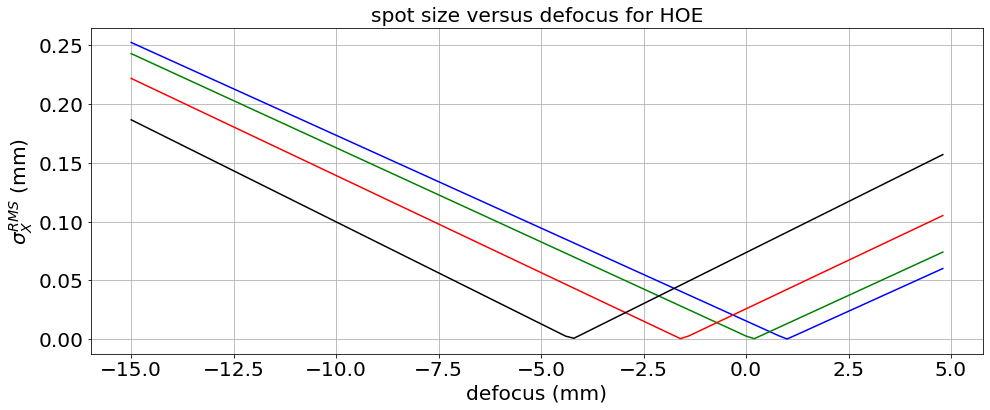

In [219]:
plt.figure(figsize=(16,6))
plt.plot(all_Zfocus,all_Xi_std_hoe[:,0],"b-")
plt.plot(all_Zfocus,all_Xi_std_hoe[:,1],"g-")
plt.plot(all_Zfocus,all_Xi_std_hoe[:,2],"r-")
plt.plot(all_Zfocus,all_Xi_std_hoe[:,3],"k-")
plt.grid()
plt.xlabel("defocus (mm)")
plt.ylabel("$\sigma_{X}^{RMS}$ (mm)")
plt.title("spot size versus defocus for HOE")

In [248]:
idx=np.where(all_Xi_std_hoe[:,3]==all_Xi_std_hoe[:,3].min())[0][0]

In [249]:
all_Zfocus[idx]

-4.200000000000038

Text(0.5, 1.0, 'spot size versus defocus for HOE')

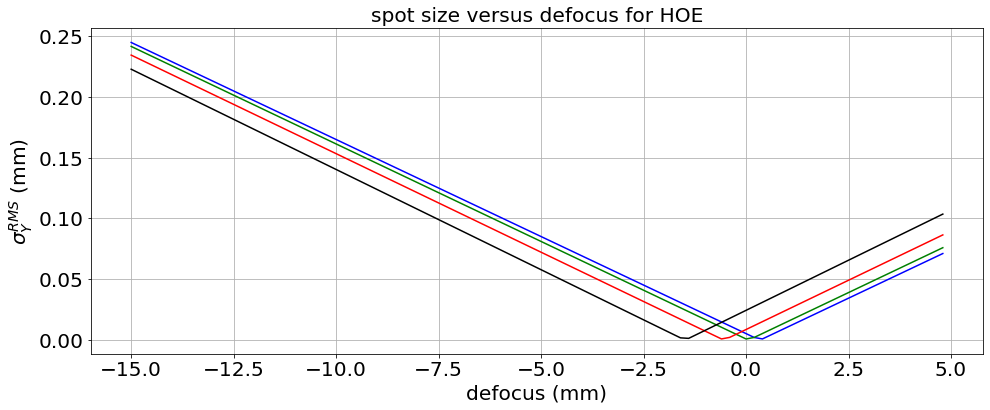

In [222]:
plt.figure(figsize=(16,6))
plt.plot(all_Zfocus,all_Yi_std_hoe[:,0],"b-")
plt.plot(all_Zfocus,all_Yi_std_hoe[:,1],"g-")
plt.plot(all_Zfocus,all_Yi_std_hoe[:,2],"r-")
plt.plot(all_Zfocus,all_Yi_std_hoe[:,3],"k-")
plt.grid()
plt.xlabel("defocus (mm)")
plt.ylabel("$\sigma_{Y}^{RMS}$ (mm)")
plt.title("spot size versus defocus for HOE")

In [223]:
all_XiYi_std_hoe=np.sqrt(all_Xi_std_hoe**2+all_Yi_std_hoe**2)

Text(0.5, 1.0, 'spot size versus defocus for HOE')

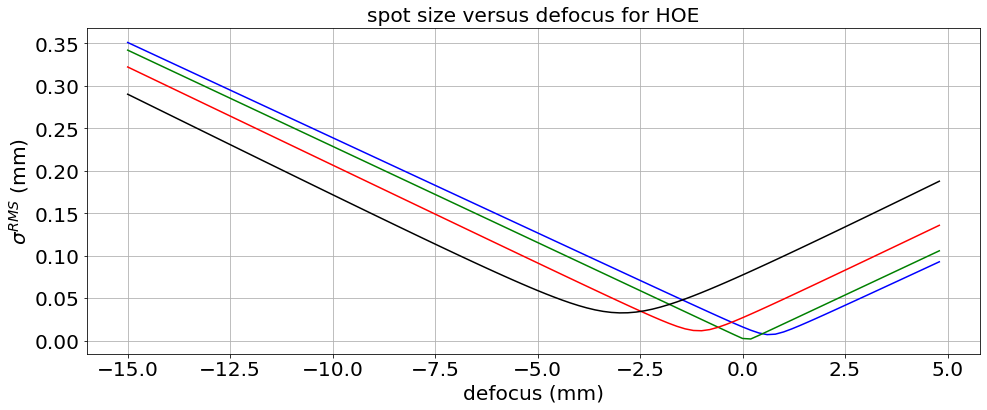

In [224]:
plt.figure(figsize=(16,6))
plt.plot(all_Zfocus,all_XiYi_std_hoe[:,0],"b-")
plt.plot(all_Zfocus,all_XiYi_std_hoe[:,1],"g-")
plt.plot(all_Zfocus,all_XiYi_std_hoe[:,2],"r-")
plt.plot(all_Zfocus,all_XiYi_std_hoe[:,3],"k-")
plt.grid()
plt.xlabel("defocus (mm)")
plt.ylabel("$\sigma^{RMS}$ (mm)")
plt.title("spot size versus defocus for HOE")

## loop on defocus for Ron 400

In [225]:
df_R400

,X0,Y0,Z0,U0,V0,W0,wave,X1,Y1,Z1,...,X3,Y3,Z3,Xfinal,Yfinal,Zfinal,Notes,Uf,Vf,Wf
0,-2.91378,-2.91378,0,0.0252377,0.0252377,0.999363,0.0004,-1.45664,-1.45664,57.7,...,9.44225,0.02828,115.5,9.44225,0.02828,115.5,OK,0.185238,0.025238,0.982370
1,-2.33103,-2.91378,0,0.0201925,0.0252406,0.999478,0.0004,-1.16531,-1.45664,57.7,...,9.42662,0.02703,115.5,9.42662,0.02703,115.5,OK,0.180193,0.025240,0.983307
2,-1.74827,-2.91378,0,0.0151457,0.0252429,0.999567,0.0004,-0.873985,-1.45664,57.7,...,9.41176,0.0258,115.5,9.41176,0.0258,115.5,OK,0.175146,0.025243,0.984219
3,-1.16551,-2.91378,0,0.0100978,0.0252445,0.99963,0.0004,-0.582655,-1.45664,57.7,...,9.39767,0.02456,115.5,9.39767,0.02456,115.5,OK,0.170098,0.025245,0.985104
4,-0.582757,-2.91378,0,0.0050491,0.0252454,0.999668,0.0004,-0.291327,-1.45664,57.7,...,9.38434,0.02332,115.5,9.38434,0.02332,115.5,OK,0.165049,0.025245,0.985962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,0.582757,2.91378,0,-0.0050491,-0.0252454,0.999668,0.001,0.291327,1.45664,57.7,...,25.149,-0.13227,115.5,25.149,-0.13227,115.5,OK,0.394951,-0.025245,0.918355
480,1.16551,2.91378,0,-0.0100978,-0.0252445,0.99963,0.001,0.582655,1.45664,57.7,...,25.0651,-0.1285,115.5,25.0651,-0.1285,115.5,OK,0.389902,-0.025245,0.920510
481,1.74827,2.91378,0,-0.0151457,-0.0252429,0.999567,0.001,0.873985,1.45664,57.7,...,24.9839,-0.12475,115.5,24.9839,-0.12475,115.5,OK,0.384854,-0.025243,0.922632
482,2.33103,2.91378,0,-0.0201925,-0.0252406,0.999478,0.001,1.16531,1.45664,57.7,...,24.9053,-0.12103,115.5,24.9053,-0.12103,115.5,OK,0.379808,-0.025241,0.924721


In [226]:
all_Xi_av_R400=np.zeros((Nfocus,NWL))
all_Xi_std_R400=np.zeros((Nfocus,NWL))
all_Yi_av_R400=np.zeros((Nfocus,NWL))
all_Yi_std_R400=np.zeros((Nfocus,NWL))

In [227]:
# loop on defocus
for ifocus,defocus in np.ndenumerate(all_Zfocus):
    idx=ifocus[0]
    df_R400["Zi"]=df_R400["Z3"]+defocus 
    # compute intersection points with the new detection plane
    df_R400["Xi"]=df_R400.apply(xi_row,axis=1)
    df_R400["Yi"]=df_R400.apply(yi_row,axis=1)
    
    # group by wavelength
    df_av=df_R400.groupby(["wave"]).mean()
    df_std=df_R400.groupby(["wave"]).std()
    
    # loop on wavelength
    for iwl in np.arange(NWL):
        all_Xi_av_R400[idx,iwl]=df_av.iloc[iwl]["Xi"]
        all_Yi_av_R400[idx,iwl]=df_av.iloc[iwl]["Yi"]
        all_Xi_std_R400[idx,iwl]=df_std.iloc[iwl]["Xi"]
        all_Yi_std_R400[idx,iwl]=df_std.iloc[iwl]["Yi"]

Text(0.5, 1.0, 'spot size versus defocus for R400')

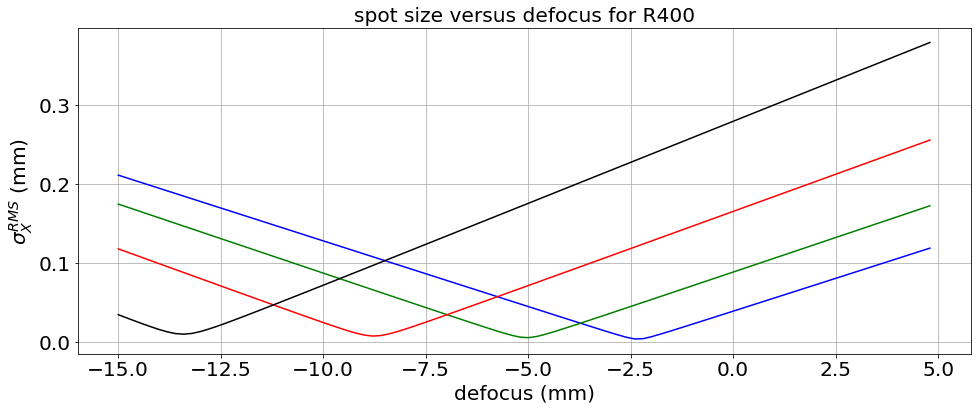

In [228]:
plt.figure(figsize=(16,6))
plt.plot(all_Zfocus,all_Xi_std_R400[:,0],"b-")
plt.plot(all_Zfocus,all_Xi_std_R400[:,1],"g-")
plt.plot(all_Zfocus,all_Xi_std_R400[:,2],"r-")
plt.plot(all_Zfocus,all_Xi_std_R400[:,3],"k-")
plt.grid()
plt.xlabel("defocus (mm)")
plt.ylabel("$\sigma_{X}^{RMS}$ (mm)")
plt.title("spot size versus defocus for R400")

In [253]:
iwl=3
idx=np.where(all_Xi_std_R400[:,iwl]==all_Xi_std_R400[:,iwl].min())[0][0]
all_Zfocus[idx]

-13.400000000000006

Text(0.5, 1.0, 'spot size versus defocus for R400')

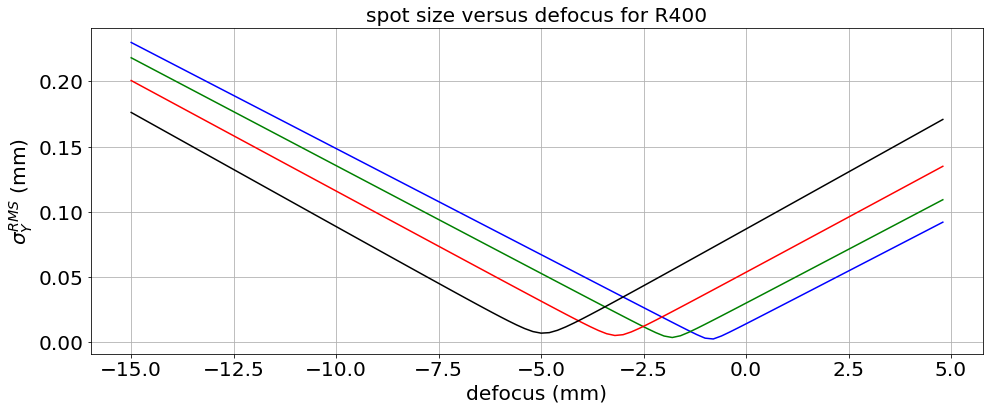

In [229]:
plt.figure(figsize=(16,6))
plt.plot(all_Zfocus,all_Yi_std_R400[:,0],"b-")
plt.plot(all_Zfocus,all_Yi_std_R400[:,1],"g-")
plt.plot(all_Zfocus,all_Yi_std_R400[:,2],"r-")
plt.plot(all_Zfocus,all_Yi_std_R400[:,3],"k-")
plt.grid()
plt.xlabel("defocus (mm)")
plt.ylabel("$\sigma_{Y}^{RMS}$ (mm)")
plt.title("spot size versus defocus for R400")

In [230]:
all_XiYi_std_R400=np.sqrt(all_Xi_std_R400**2+all_Yi_std_R400**2)

Text(0.5, 1.0, 'spot size versus defocus for R400')

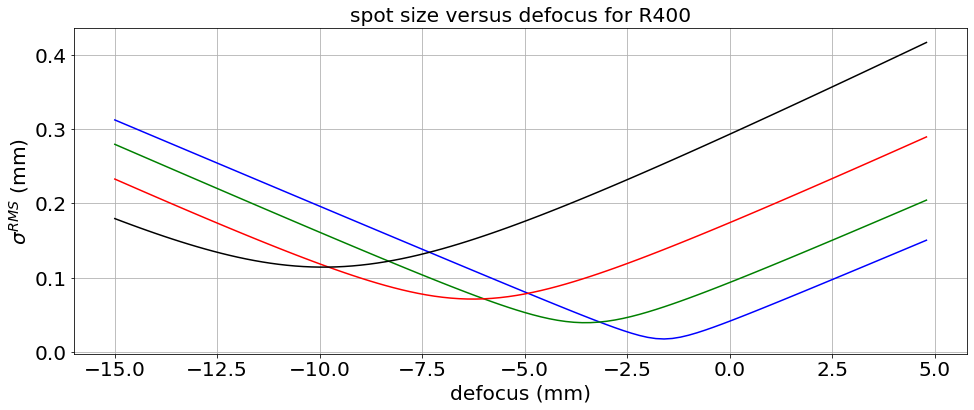

In [231]:
plt.figure(figsize=(16,6))
plt.plot(all_Zfocus,all_XiYi_std_R400[:,0],"b-")
plt.plot(all_Zfocus,all_XiYi_std_R400[:,1],"g-")
plt.plot(all_Zfocus,all_XiYi_std_R400[:,2],"r-")
plt.plot(all_Zfocus,all_XiYi_std_R400[:,3],"k-")
plt.grid()
plt.xlabel("defocus (mm)")
plt.ylabel("$\sigma^{RMS}$ (mm)")
plt.title("spot size versus defocus for R400")

Text(0.5, 1.0, 'spot size versus defocus for HOE and R400')

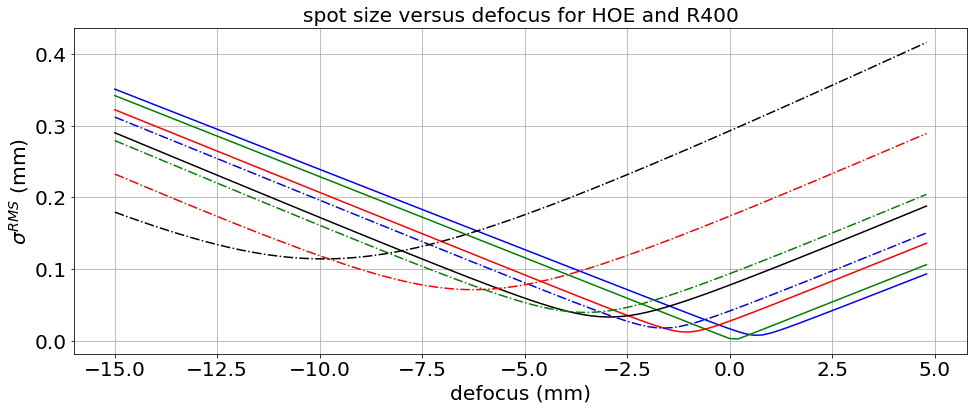

In [232]:
plt.figure(figsize=(16,6))
plt.plot(all_Zfocus,all_XiYi_std_hoe[:,0],"b-")
plt.plot(all_Zfocus,all_XiYi_std_hoe[:,1],"g-")
plt.plot(all_Zfocus,all_XiYi_std_hoe[:,2],"r-")
plt.plot(all_Zfocus,all_XiYi_std_hoe[:,3],"k-")

plt.plot(all_Zfocus,all_XiYi_std_R400[:,0],"b-.")
plt.plot(all_Zfocus,all_XiYi_std_R400[:,1],"g-.")
plt.plot(all_Zfocus,all_XiYi_std_R400[:,2],"r-.")
plt.plot(all_Zfocus,all_XiYi_std_R400[:,3],"k-.")
plt.grid()
plt.xlabel("defocus (mm)")
plt.ylabel("$\sigma^{RMS}$ (mm)")
plt.title("spot size versus defocus for HOE and R400")

## loop on defocus for Ron 200

In [233]:
df_R200

,X0,Y0,Z0,U0,V0,W0,wave,X1,Y1,Z1,...,X3,Y3,Z3,Xfinal,Yfinal,Zfinal,Notes,Uf,Vf,Wf
0,-2.91378,-2.91378,0,0.0252377,0.0252377,0.999363,0.0004,-1.45664,-1.45664,57.7,...,4.59499,0.00743,115.708,4.59499,0.00743,115.7077,OK,0.105238,0.025238,0.994127
1,-2.33103,-2.91378,0,0.0201925,0.0252406,0.999478,0.0004,-1.16531,-1.45664,57.7,...,4.59063,0.00684,115.708,4.59063,0.00684,115.7077,OK,0.100193,0.025241,0.994648
2,-1.74827,-2.91378,0,0.0151457,0.0252429,0.999567,0.0004,-0.873985,-1.45664,57.7,...,4.58662,0.00626,115.708,4.58662,0.00626,115.7077,OK,0.095146,0.025243,0.995143
3,-1.16551,-2.91378,0,0.0100978,0.0252445,0.99963,0.0004,-0.582655,-1.45664,57.7,...,4.58298,0.00567,115.708,4.58298,0.00567,115.7077,OK,0.090098,0.025245,0.995613
4,-0.582757,-2.91378,0,0.0050491,0.0252454,0.999668,0.0004,-0.291327,-1.45664,57.7,...,4.57969,0.00507,115.708,4.57969,0.00507,115.7077,OK,0.085049,0.025245,0.996057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,0.582757,2.91378,0,-0.0050491,-0.0252454,0.999668,0.001,0.291327,1.45664,57.7,...,11.6228,-0.02801,115.708,11.6228,-0.02801,115.7077,OK,0.194951,-0.025245,0.980488
480,1.16551,2.91378,0,-0.0100978,-0.0252445,0.99963,0.001,0.582655,1.45664,57.7,...,11.6061,-0.02648,115.708,11.6061,-0.02648,115.7077,OK,0.189902,-0.025245,0.981478
481,1.74827,2.91378,0,-0.0151457,-0.0252429,0.999567,0.001,0.873985,1.45664,57.7,...,11.5903,-0.02495,115.708,11.5903,-0.02495,115.7077,OK,0.184854,-0.025243,0.982442
482,2.33103,2.91378,0,-0.0201925,-0.0252406,0.999478,0.001,1.16531,1.45664,57.7,...,11.5755,-0.02342,115.708,11.5755,-0.02342,115.7077,OK,0.179807,-0.025241,0.983378


In [234]:
all_Xi_av_R200=np.zeros((Nfocus,NWL))
all_Xi_std_R200=np.zeros((Nfocus,NWL))
all_Yi_av_R200=np.zeros((Nfocus,NWL))
all_Yi_std_R200=np.zeros((Nfocus,NWL))

In [235]:
# loop on defocus
for ifocus,defocus in np.ndenumerate(all_Zfocus):
    idx=ifocus[0]
    df_R200["Zi"]=df_R200["Z3"]+defocus 
    # compute intersection points with the new detection plane
    df_R200["Xi"]=df_R200.apply(xi_row,axis=1)
    df_R200["Yi"]=df_R200.apply(yi_row,axis=1)
    
    # group by wavelength
    df_av=df_R200.groupby(["wave"]).mean()
    df_std=df_R200.groupby(["wave"]).std()
    
    # loop on wavelength
    for iwl in np.arange(NWL):
        all_Xi_av_R200[idx,iwl]=df_av.iloc[iwl]["Xi"]
        all_Yi_av_R200[idx,iwl]=df_av.iloc[iwl]["Yi"]
        all_Xi_std_R200[idx,iwl]=df_std.iloc[iwl]["Xi"]
        all_Yi_std_R200[idx,iwl]=df_std.iloc[iwl]["Yi"]

Text(0.5, 1.0, 'spot size versus defocus for R200')

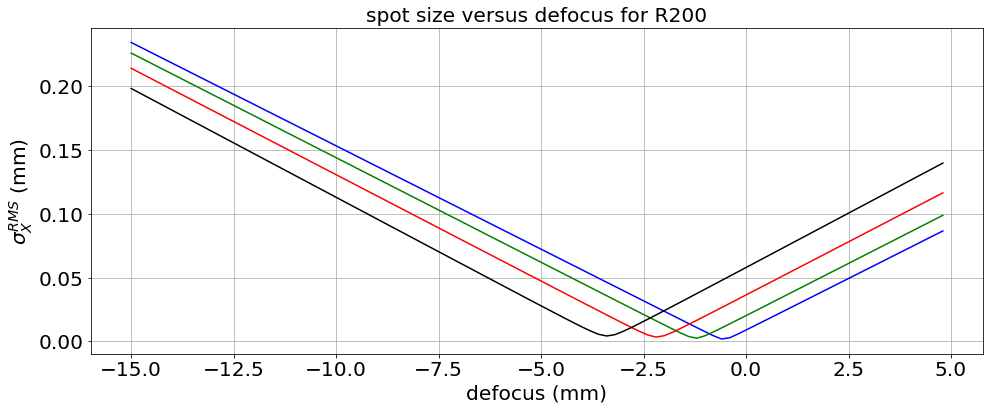

In [236]:
plt.figure(figsize=(16,6))
plt.plot(all_Zfocus,all_Xi_std_R200[:,0],"b-")
plt.plot(all_Zfocus,all_Xi_std_R200[:,1],"g-")
plt.plot(all_Zfocus,all_Xi_std_R200[:,2],"r-")
plt.plot(all_Zfocus,all_Xi_std_R200[:,3],"k-")
plt.grid()
plt.xlabel("defocus (mm)")
plt.ylabel("$\sigma_{X}^{RMS}$ (mm)")
plt.title("spot size versus defocus for R200")

In [257]:
iwl=3
idx=np.where(all_Xi_std_R200[:,iwl]==all_Xi_std_R200[:,iwl].min())[0][0]
all_Zfocus[idx]

-3.400000000000041

Text(0.5, 1.0, 'spot size versus defocus for R200')

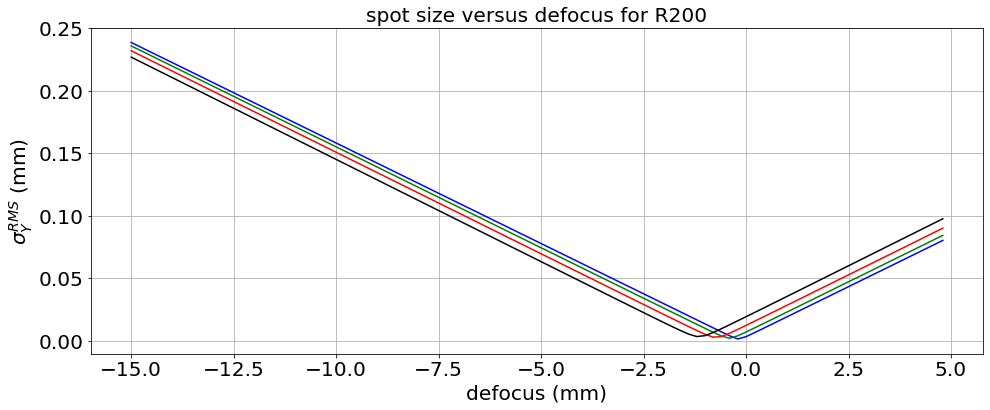

In [237]:
plt.figure(figsize=(16,6))
plt.plot(all_Zfocus,all_Yi_std_R200[:,0],"b-")
plt.plot(all_Zfocus,all_Yi_std_R200[:,1],"g-")
plt.plot(all_Zfocus,all_Yi_std_R200[:,2],"r-")
plt.plot(all_Zfocus,all_Yi_std_R200[:,3],"k-")
plt.grid()
plt.xlabel("defocus (mm)")
plt.ylabel("$\sigma_{Y}^{RMS}$ (mm)")
plt.title("spot size versus defocus for R200")

In [238]:
all_XiYi_std_R200=np.sqrt(all_Xi_std_R200**2+all_Yi_std_R200**2)

Text(0.5, 1.0, 'spot size versus defocus for R200')

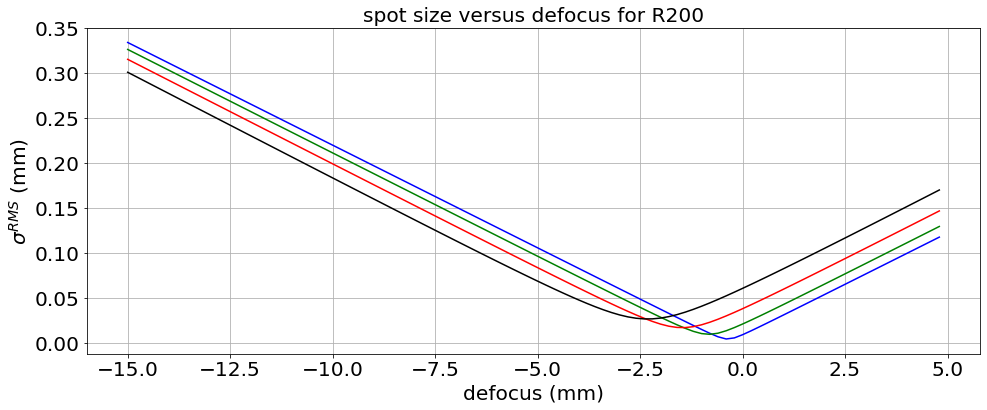

In [239]:
plt.figure(figsize=(16,6))
plt.plot(all_Zfocus,all_XiYi_std_R200[:,0],"b-")
plt.plot(all_Zfocus,all_XiYi_std_R200[:,1],"g-")
plt.plot(all_Zfocus,all_XiYi_std_R200[:,2],"r-")
plt.plot(all_Zfocus,all_XiYi_std_R200[:,3],"k-")
plt.grid()
plt.xlabel("defocus (mm)")
plt.ylabel("$\sigma^{RMS}$ (mm)")
plt.title("spot size versus defocus for R200")

## Combination HOE, R400 and R200

- solid line : HOE
- dotted-dashed line : R400
- dotted line : R200

Text(0.5, 1.0, 'spot size versus defocus for HOE, , R400 and R200')

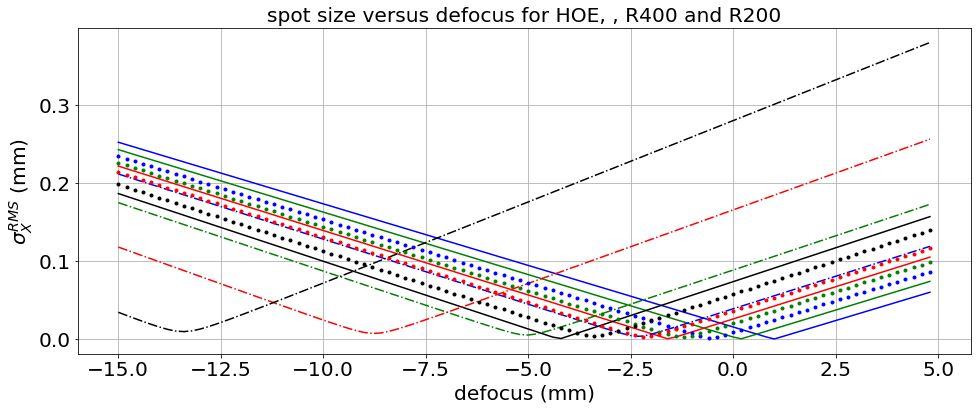

In [240]:
plt.figure(figsize=(16,6))
plt.plot(all_Zfocus,all_Xi_std_hoe[:,0],"b-")
plt.plot(all_Zfocus,all_Xi_std_hoe[:,1],"g-")
plt.plot(all_Zfocus,all_Xi_std_hoe[:,2],"r-")
plt.plot(all_Zfocus,all_Xi_std_hoe[:,3],"k-")

plt.plot(all_Zfocus,all_Xi_std_R400[:,0],"b-.")
plt.plot(all_Zfocus,all_Xi_std_R400[:,1],"g-.")
plt.plot(all_Zfocus,all_Xi_std_R400[:,2],"r-.")
plt.plot(all_Zfocus,all_Xi_std_R400[:,3],"k-.")

plt.plot(all_Zfocus,all_Xi_std_R200[:,0],"b.")
plt.plot(all_Zfocus,all_Xi_std_R200[:,1],"g.")
plt.plot(all_Zfocus,all_Xi_std_R200[:,2],"r.")
plt.plot(all_Zfocus,all_Xi_std_R200[:,3],"k.")



plt.grid()
plt.xlabel("defocus (mm)")
plt.ylabel("$\sigma_{X}^{RMS}$ (mm)")
plt.title("spot size versus defocus for HOE, , R400 and R200")

Text(0.5, 1.0, 'spot size versus defocus for HOE, , R400 and R200')

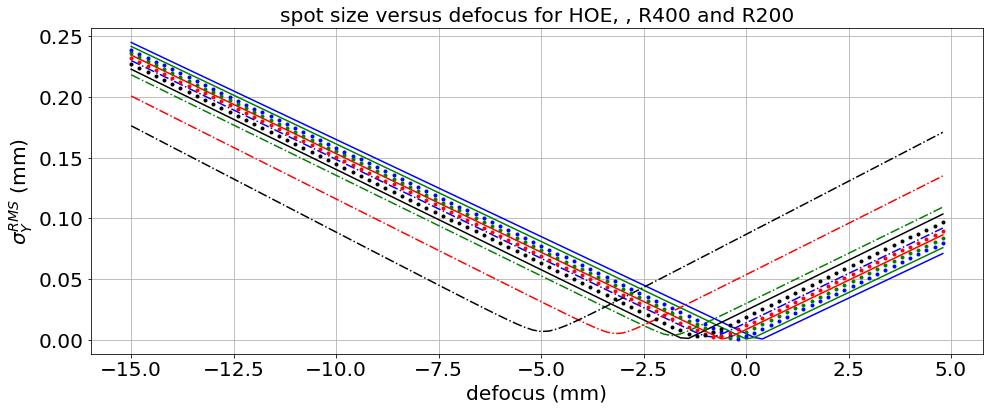

In [241]:
plt.figure(figsize=(16,6))
plt.plot(all_Zfocus,all_Yi_std_hoe[:,0],"b-")
plt.plot(all_Zfocus,all_Yi_std_hoe[:,1],"g-")
plt.plot(all_Zfocus,all_Yi_std_hoe[:,2],"r-")
plt.plot(all_Zfocus,all_Yi_std_hoe[:,3],"k-")

plt.plot(all_Zfocus,all_Yi_std_R400[:,0],"b-.")
plt.plot(all_Zfocus,all_Yi_std_R400[:,1],"g-.")
plt.plot(all_Zfocus,all_Yi_std_R400[:,2],"r-.")
plt.plot(all_Zfocus,all_Yi_std_R400[:,3],"k-.")

plt.plot(all_Zfocus,all_Yi_std_R200[:,0],"b.")
plt.plot(all_Zfocus,all_Yi_std_R200[:,1],"g.")
plt.plot(all_Zfocus,all_Yi_std_R200[:,2],"r.")
plt.plot(all_Zfocus,all_Yi_std_R200[:,3],"k.")


plt.grid()
plt.xlabel("defocus (mm)")
plt.ylabel("$\sigma_{Y}^{RMS}$ (mm)")
plt.title("spot size versus defocus for HOE, , R400 and R200")

Text(0.5, 1.0, 'spot size versus defocus for HOE, R400 and R200')

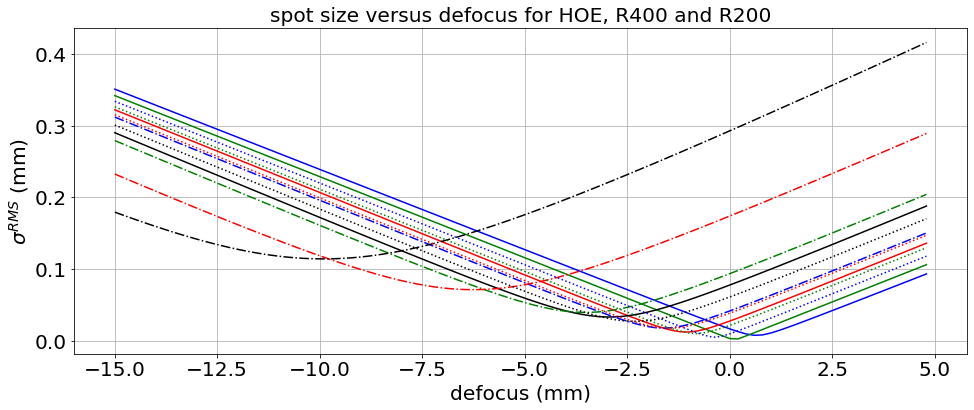

In [242]:
plt.figure(figsize=(16,6))
plt.plot(all_Zfocus,all_XiYi_std_hoe[:,0],"b-")
plt.plot(all_Zfocus,all_XiYi_std_hoe[:,1],"g-")
plt.plot(all_Zfocus,all_XiYi_std_hoe[:,2],"r-")
plt.plot(all_Zfocus,all_XiYi_std_hoe[:,3],"k-")

plt.plot(all_Zfocus,all_XiYi_std_R400[:,0],"b-.")
plt.plot(all_Zfocus,all_XiYi_std_R400[:,1],"g-.")
plt.plot(all_Zfocus,all_XiYi_std_R400[:,2],"r-.")
plt.plot(all_Zfocus,all_XiYi_std_R400[:,3],"k-.")

plt.plot(all_Zfocus,all_XiYi_std_R200[:,0],"b:")
plt.plot(all_Zfocus,all_XiYi_std_R200[:,1],"g:")
plt.plot(all_Zfocus,all_XiYi_std_R200[:,2],"r:")
plt.plot(all_Zfocus,all_XiYi_std_R200[:,3],"k:")

plt.grid()
plt.xlabel("defocus (mm)")
plt.ylabel("$\sigma^{RMS}$ (mm)")
plt.title("spot size versus defocus for HOE, R400 and R200")

# Image for paper

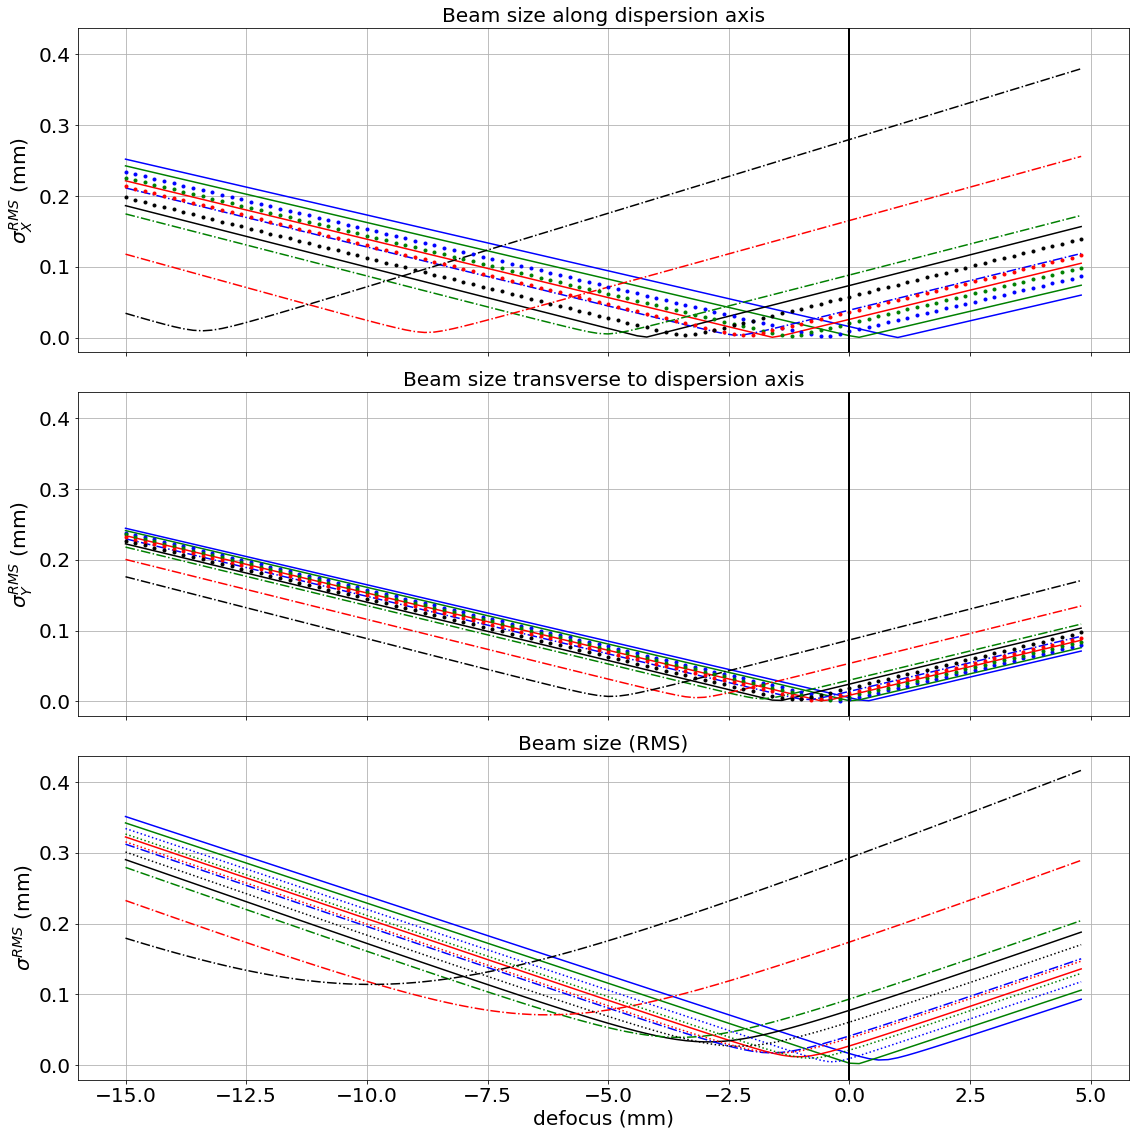

In [243]:
plt.figure(figsize=(16,16))


ax1 = plt.subplot(311)
plt.plot(all_Zfocus,all_Xi_std_hoe[:,0],"b-")
plt.plot(all_Zfocus,all_Xi_std_hoe[:,1],"g-")
plt.plot(all_Zfocus,all_Xi_std_hoe[:,2],"r-")
plt.plot(all_Zfocus,all_Xi_std_hoe[:,3],"k-")

plt.plot(all_Zfocus,all_Xi_std_R400[:,0],"b-.")
plt.plot(all_Zfocus,all_Xi_std_R400[:,1],"g-.")
plt.plot(all_Zfocus,all_Xi_std_R400[:,2],"r-.")
plt.plot(all_Zfocus,all_Xi_std_R400[:,3],"k-.")

plt.plot(all_Zfocus,all_Xi_std_R200[:,0],"b.")
plt.plot(all_Zfocus,all_Xi_std_R200[:,1],"g.")
plt.plot(all_Zfocus,all_Xi_std_R200[:,2],"r.")
plt.plot(all_Zfocus,all_Xi_std_R200[:,3],"k.")

plt.axvline(x=0,lw=2,c="k")

plt.grid()
#plt.xlabel("defocus (mm)")
plt.ylabel("$\sigma_{X}^{RMS}$ (mm)")
plt.title("Beam size along dispersion axis")

plt.setp(ax1.get_xticklabels(), visible=False)
#plt.setp(ax1.get_xticklabels(), fontsize=6)


ax2 = plt.subplot(312, sharex=ax1,sharey=ax1)
plt.plot(all_Zfocus,all_Yi_std_hoe[:,0],"b-")
plt.plot(all_Zfocus,all_Yi_std_hoe[:,1],"g-")
plt.plot(all_Zfocus,all_Yi_std_hoe[:,2],"r-")
plt.plot(all_Zfocus,all_Yi_std_hoe[:,3],"k-")

plt.plot(all_Zfocus,all_Yi_std_R400[:,0],"b-.")
plt.plot(all_Zfocus,all_Yi_std_R400[:,1],"g-.")
plt.plot(all_Zfocus,all_Yi_std_R400[:,2],"r-.")
plt.plot(all_Zfocus,all_Yi_std_R400[:,3],"k-.")

plt.plot(all_Zfocus,all_Yi_std_R200[:,0],"b.")
plt.plot(all_Zfocus,all_Yi_std_R200[:,1],"g.")
plt.plot(all_Zfocus,all_Yi_std_R200[:,2],"r.")
plt.plot(all_Zfocus,all_Yi_std_R200[:,3],"k.")

plt.axvline(x=0,lw=2,c="k")

plt.grid()
#plt.xlabel("defocus (mm)")
plt.ylabel("$\sigma_{Y}^{RMS}$ (mm)")
plt.title("Beam size transverse to dispersion axis")

# make these tick labels invisible
plt.setp(ax2.get_xticklabels(), visible=False)

# share x and y
ax3 = plt.subplot(313, sharex=ax1, sharey=ax1)
plt.plot(all_Zfocus,all_XiYi_std_hoe[:,0],"b-")
plt.plot(all_Zfocus,all_XiYi_std_hoe[:,1],"g-")
plt.plot(all_Zfocus,all_XiYi_std_hoe[:,2],"r-")
plt.plot(all_Zfocus,all_XiYi_std_hoe[:,3],"k-")

plt.plot(all_Zfocus,all_XiYi_std_R400[:,0],"b-.")
plt.plot(all_Zfocus,all_XiYi_std_R400[:,1],"g-.")
plt.plot(all_Zfocus,all_XiYi_std_R400[:,2],"r-.")
plt.plot(all_Zfocus,all_XiYi_std_R400[:,3],"k-.")

plt.plot(all_Zfocus,all_XiYi_std_R200[:,0],"b:")
plt.plot(all_Zfocus,all_XiYi_std_R200[:,1],"g:")
plt.plot(all_Zfocus,all_XiYi_std_R200[:,2],"r:")
plt.plot(all_Zfocus,all_XiYi_std_R200[:,3],"k:")

plt.axvline(x=0,lw=2,c="k")

plt.grid()
plt.xlabel("defocus (mm)")
plt.ylabel("$\sigma^{RMS}$ (mm)")
plt.title("Beam size (RMS)")

plt.tight_layout()
plt.savefig("defocus.pdf")

plt.show()
